# Generator interface
This notebook provides an interface for the **generator.py** script.

In [1]:
#Ldft classes
from generator import *
from ldft_classes_v2.lg_2d_highl import LG2dAOHighl as Highl2d
from ldft_classes_v2.lg_3d_highl import LG3dAOHighl as Highl3d
from ldft_classes_v2.lg_2d_mf import LG2dMf as Mf2d
from ldft_classes_v2.lg_3d_mf import LG3dMf as Mf3d

#Ploting tools
from matplotlib import rcParams
import matplotlib.pyplot as plt

# 1. Create a profile
## a) with standart initiation
### two dimensions

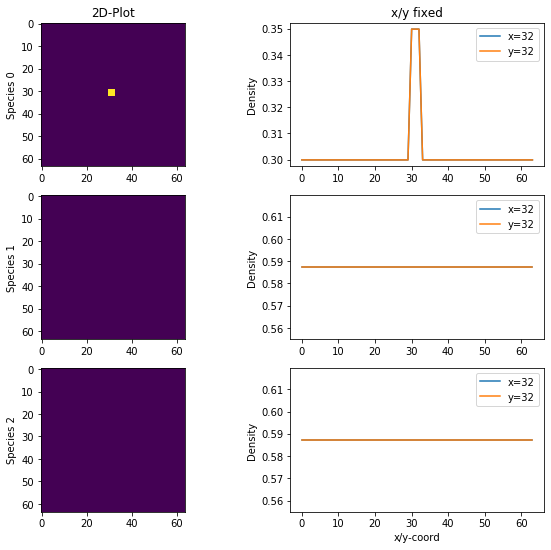

In [78]:
initSys = create_sys(Highl2d, (64, 64), 3.0, 0.3, 'sph', bd_cond='periodic')
fig=initSys.print_2d_profile2()

View the System

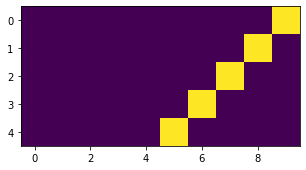

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.imshow(initSys.r_c)

### three dimensions

In [82]:
initSys = create_sys(Highl3d, (45, 45, 45), 1.0 , 0.3, 'sph', bd_cond='periodic')

View the System

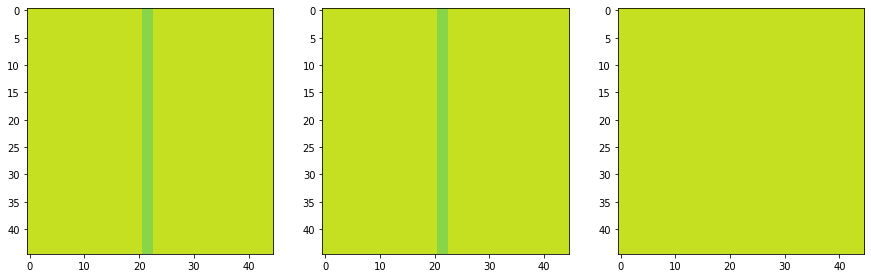

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax[0].imshow(initSys.r_c[15,:,:], vmin=0.0, vmax=0.55)
ax[1].imshow(initSys.r_c[:,15,:], vmin=0.0, vmax=0.55)
ax[2].imshow(initSys.r_c[:,:,15], vmin=0.0, vmax=0.55)
#fig.colorbar(profile, ax=[ax[0],ax[1],ax[2]], orientation='vertical', fraction=.1)

## b) where the init-profile is taken over from another confic
Load an old system

In [39]:
#path to a system
path = "../samples/2d-highl/size=40/epsi=2,0"
#load system
initSys = Mf2d.load_syst(os.path.abspath(path), 'dens=0,11(sph).pkl')
#show it
#print(initSys)
#fig=initSys.print_2d_profile2()

create a new one with the old as initial state

In [40]:
#create new system
syst = create_sys(Highl2d, (40, 40), 2.0, 0.035, initSys)

Individually design the initial profile:

In [55]:
syst.r=np.concatenate((syst.r[:,1:30], syst.r[:,29:64]), axis=1)

(40, 50)

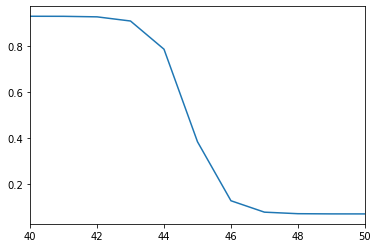

In [72]:
plt.plot(syst.r[0,:])
plt.xlim((40, 50))

In [89]:
syst.r[30:34,45:47] = 0.8
syst.r[30:34,16:18] = 0.8

0.04316803993435546
0.9693008563147745


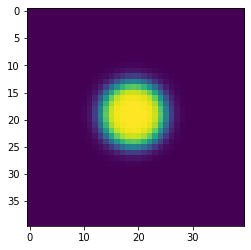

In [19]:
plt.imshow(syst.r_c)
print(np.min(syst.r_c))
print(np.max(syst.r_c))

# 2. Iterate and save
## a) Continue iteration or create a single profile

In [35]:
#determine the parameters
system = syst
alpha = 0.02
it_step =80000
chp = 'dec10'
saveSpec = 'alpha_test'
min_err= 10**(-20)

#start iteration
iterate_and_save(system, alpha, it_step, chp, saveSpec=saveSpec, min_err=min_err)

checkpoint at:        100, Error:   1.3315319031306432
checkpoint at:       1100, Error: 6.534397575548983e-06


Show the results:

0.03499999999831821
0.03500000001981531
0.034999999999999976
Figure(583.2x360)
4541.654518161822
[-4.009590847819427, 1.854586542131141, 1.854586542131141]


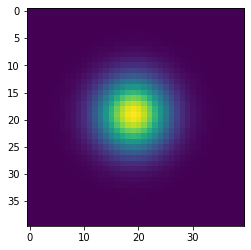

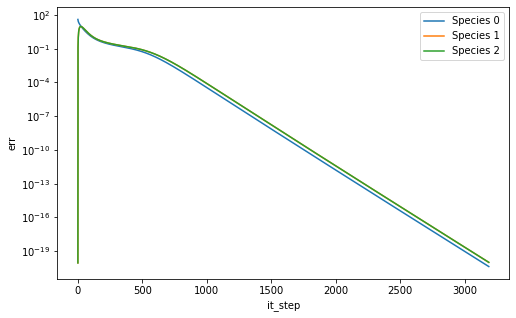

In [38]:
plt.imshow(system.r_c)
print(np.min(system.r_c))
print(np.max(system.r_c))
print(np.mean(system.r_c))
print(system.print_error())
print(system.cal_F())
print(system.mu)

## c) generate a series of profiles

In [17]:
#determine the parameters
Model = Highl2d
size = (100, 100)
epsi = 2
densRange = [0.2, 0.3]
stepWidth = 0.025
init = initSys # or 'hom', 'sph', 'cyl', 'sl'
alpha = 0.02
it_step = 50000
chp = 'dec2'
saveSpec = 'ser'

#start iteration
generate_series(Highl2d, size, epsi, densRange, stepWidth, init, alpha, it_step, chp, saveSpec)

checkpoint at:         20, Error: 2.424150069349821e-10
checkpoint at:         40, Error: 2.409080879573339e-10
checkpoint at:         60, Error: 2.3941053634760167e-10
checkpoint at:         80, Error: 2.379222937785858e-10
checkpoint at:        100, Error: 2.364433025230275e-10
checkpoint at:        300, Error: 2.22149731560892e-10
checkpoint at:        500, Error: 2.0872023391993812e-10
checkpoint at:        700, Error: 1.9610257549071078e-10
checkpoint at:        900, Error: 1.8424767954539207e-10
checkpoint at:       1100, Error: 1.7310943629584507e-10
checkpoint at:       3100, Error: 9.279128421317205e-11
checkpoint at:       5100, Error: 4.973848915834282e-11
checkpoint at:       7100, Error: 2.6661048927351757e-11
checkpoint at:       9100, Error: 1.4290957158736282e-11
checkpoint at:      11100, Error: 7.660286186849282e-12
checkpoint at:      31100, Error: 1.4999388132395178e-14
checkpoint at:         20, Error:    4.102269711720805
checkpoint at:         40, Error:     2.04

## d) search for a transition
### Homogeneous-Droplet transition

In [6]:
#determine the parameters
Model = Highl2d
size = (40, 40)
epsi = 2
initDrSys = initSys
densRange = [0.02, 0.05]
alpha = 0.02
it_step = 80000
chp = 'dec2'
acuracy = 0.01

#start the search
search_trans(Model, size, epsi, densRange, alpha, it_step, chp, acuracy, 'hom', initDrSys, specLeft='hom', specRight='sph')

<class 'ldft_classes_v2.lg_2d_highl.LG2dAOHighl'>
current density: 0.035
checkpoint at:         20, Error:   12.027768497192945
checkpoint at:         40, Error:     6.03740972851203
checkpoint at:         60, Error:   3.3811937088810002
checkpoint at:         80, Error:   2.0475197001470518
checkpoint at:        100, Error:   1.3315319031306432
checkpoint at:        300, Error:  0.18570332545244347
checkpoint at:        500, Error: 0.054845308647715155
checkpoint at:        700, Error: 0.004869541623167905
checkpoint at:        900, Error: 0.00019426868077321774
checkpoint at:       1100, Error: 6.534397575548983e-06
checkpoint at:       3100, Error: 1.8270833133702638e-20
leftF=-263.6791345076408
rightF=-263.6791345076381
no Transition here


# 3. Show results
Show a single config

In [28]:
#path to a system
path = "./generatorOutput/2d-highl/size=40/epsi=2"
#load system
syst = Highl3d.load_syst(os.path.abspath(path), 'dens=0,035(noTrans).pkl')

rho_min=0.034999999999999996
rho_max=0.034999999999999996
F_eff=4541.654518161819
Homogeneous


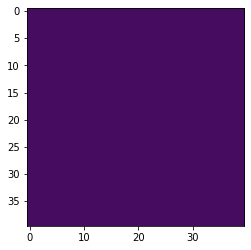

In [29]:
print('rho_min='+str(np.min(syst.r_c)))
print('rho_max='+str(np.max(syst.r_c)))
print('F_eff='+str(syst.cal_F()))
print(syst.det_intface_shape())
fig, ax = plt.subplots(nrows=1, ncols=1)
profile =ax.imshow(syst.r_c, vmin=0, vmax=1)

/home/manuel/miniconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


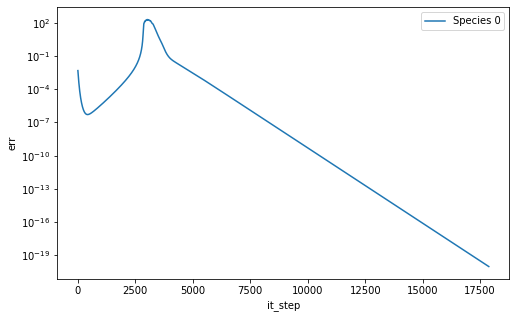

In [73]:
fig=syst.print_error()
fig.show()